In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"]=(10,10)

In [28]:
df = pd.read_csv("data/1_tabla_trabajo.csv", index_col =0)

In [29]:
df.shape

(25973, 10)

In [49]:
df_sin_nulos = pd.read_csv("data/2_tabla_trabajo_sin_nulos.csv", index_col =0)

In [50]:
df_sin_nulos.shape

(15391, 10)

In [31]:
df.head(2)

,edad,genero,pais,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_minimo,rango_salario_maximo,continente
0,50-54,Man,India,5-10 years,"25,000-29,999",Manufacturing/Fabrication,Other,25000.0,29999.0,Asia
1,50-54,Man,Indonesia,20+ years,"60,000-69,999",Manufacturing/Fabrication,Program/Project Manager,60000.0,69999.0,Asia


In [ ]:
# df.groupby(["edad", "genero", "años_programando", "salario_anual", "sector_trabajo_actual","puesto_trabajo", "continente"])["rango_salario_maximo"].count().reset_index()

In [33]:
df[(df["rango_salario_minimo"] >= 300000)].count()

edad                     181
genero                   181
pais                     181
años_programando         181
salario_anual            181
sector_trabajo_actual    181
puesto_trabajo           181
rango_salario_minimo     181
rango_salario_maximo     181
continente               181
dtype: int64

<AxesSubplot:xlabel='rango_salario_maximo', ylabel='años_programando'>

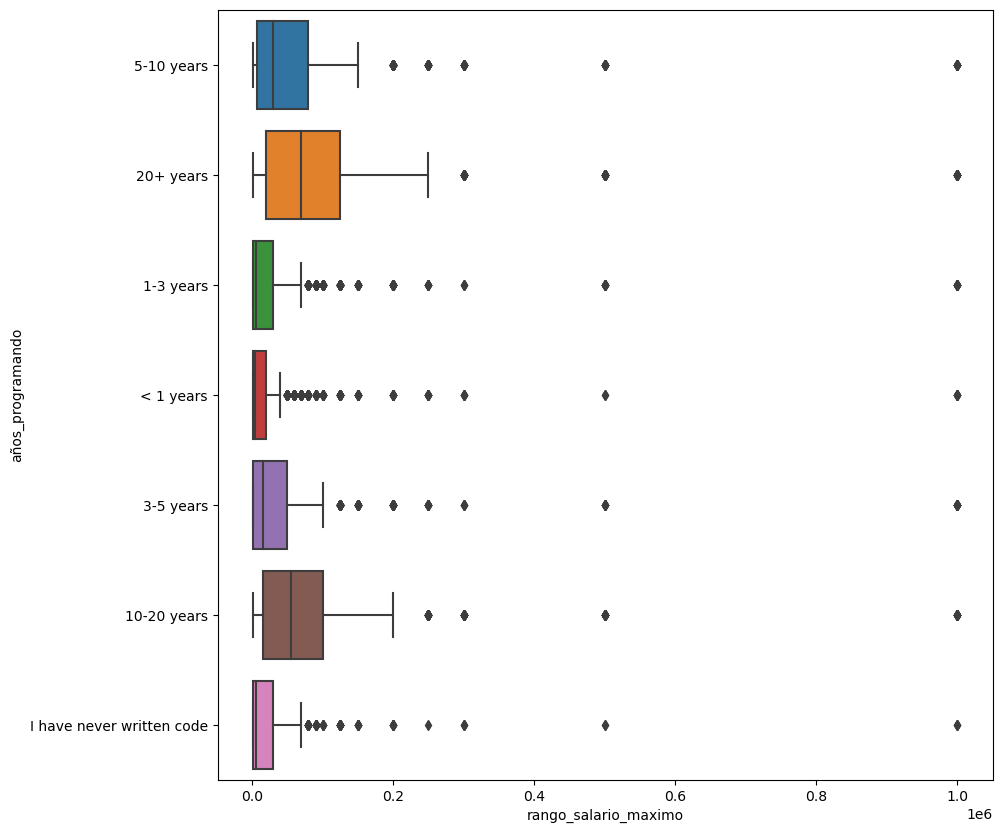

In [34]:

sns.boxplot(x= "rango_salario_maximo", y="años_programando", data = df)
#plt.yticks(rotation = 45)
#plt.xlim([0,300000])

<AxesSubplot:xlabel='rango_salario_maximo', ylabel='continente'>

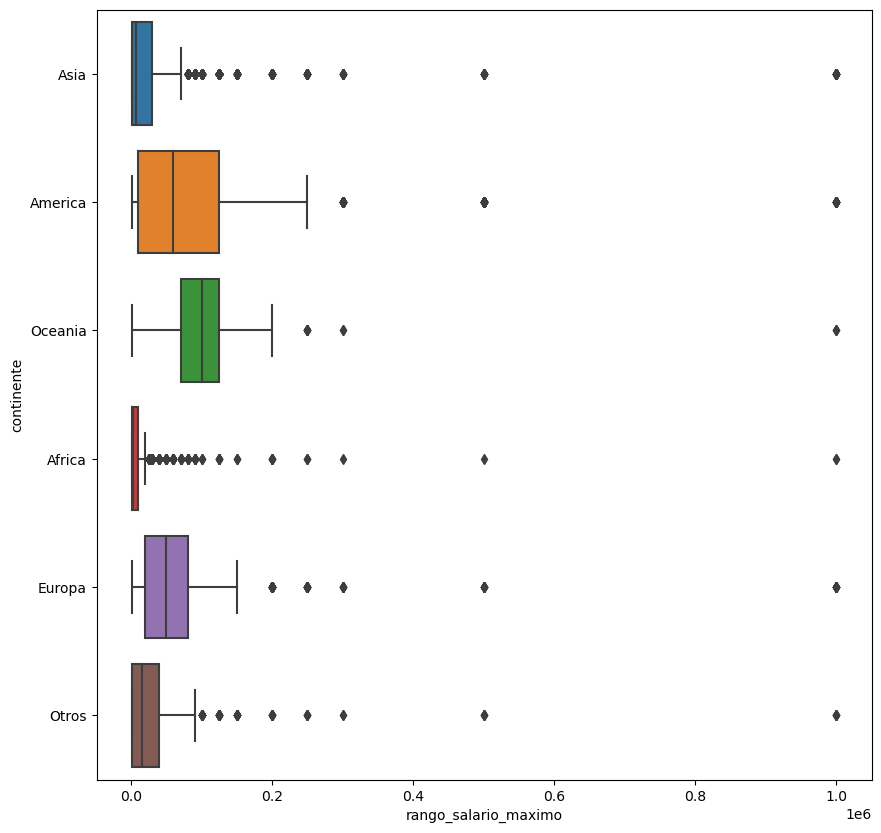

In [35]:
sns.boxplot(x= "rango_salario_maximo", y="continente", data = df)
#plt.yticks(rotation = 45)
#plt.xlim([0,300000])

<AxesSubplot:xlabel='rango_salario_maximo', ylabel='continente'>

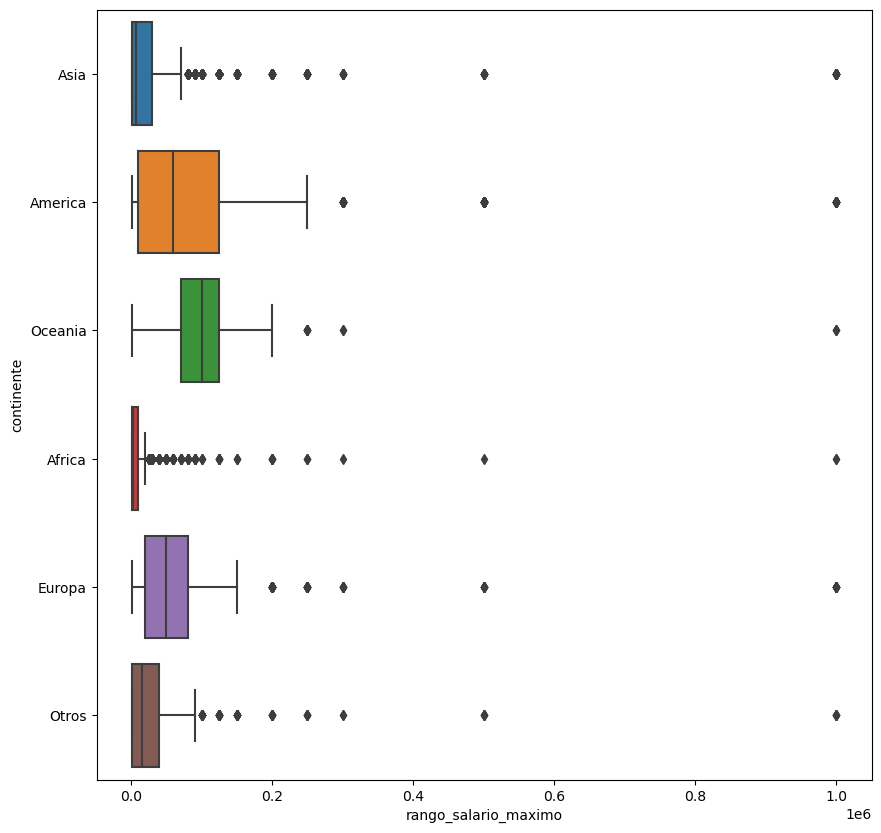

In [51]:
sns.boxplot(x= "rango_salario_maximo", y="continente", data = df_sin_nulos)
#plt.yticks(rotation = 45)
#plt.xlim([0,300000])

<AxesSubplot:xlabel='rango_salario_maximo', ylabel='edad'>

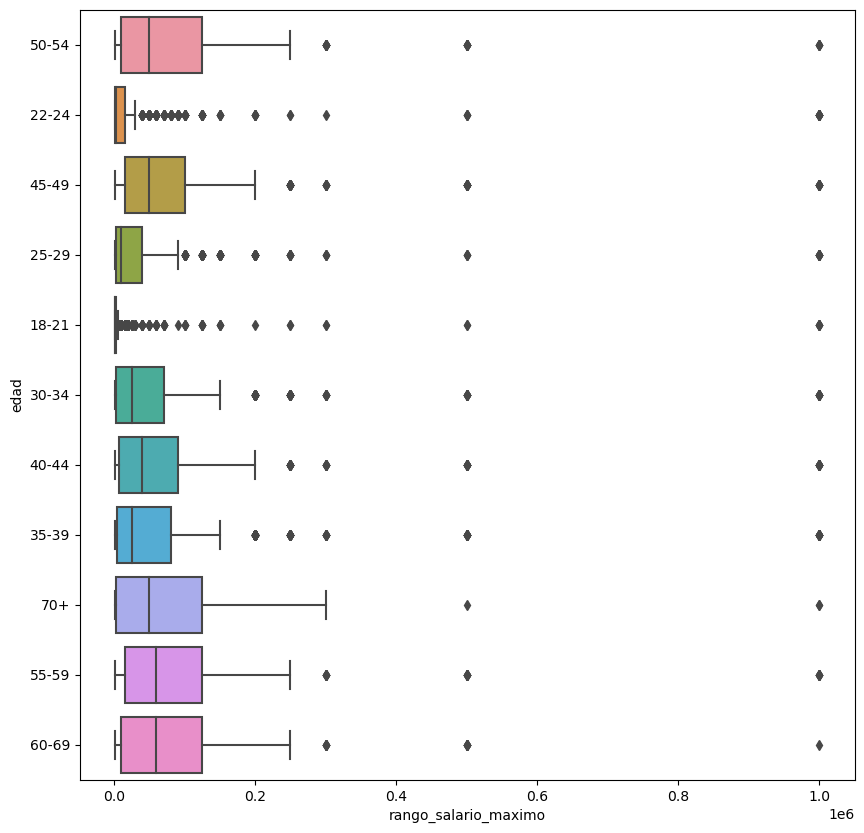

In [36]:
sns.boxplot(x= "rango_salario_maximo", y="edad", data = df)
#plt.yticks(rotation = 45)
#plt.xlim([0,300000])

<AxesSubplot:xlabel='rango_salario_maximo', ylabel='genero'>

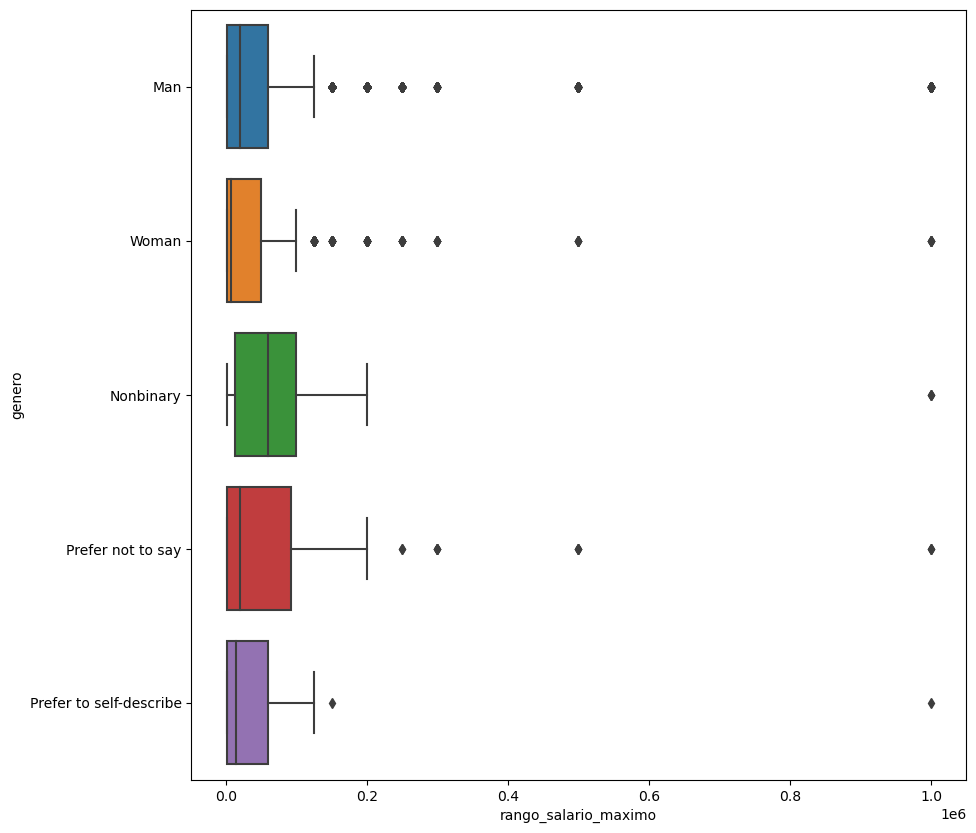

In [37]:
sns.boxplot(x= "rango_salario_maximo", y="genero", data = df)
#plt.yticks(rotation = 45)
#plt.xlim([0,300000])

<AxesSubplot:xlabel='rango_salario_maximo', ylabel='pais'>

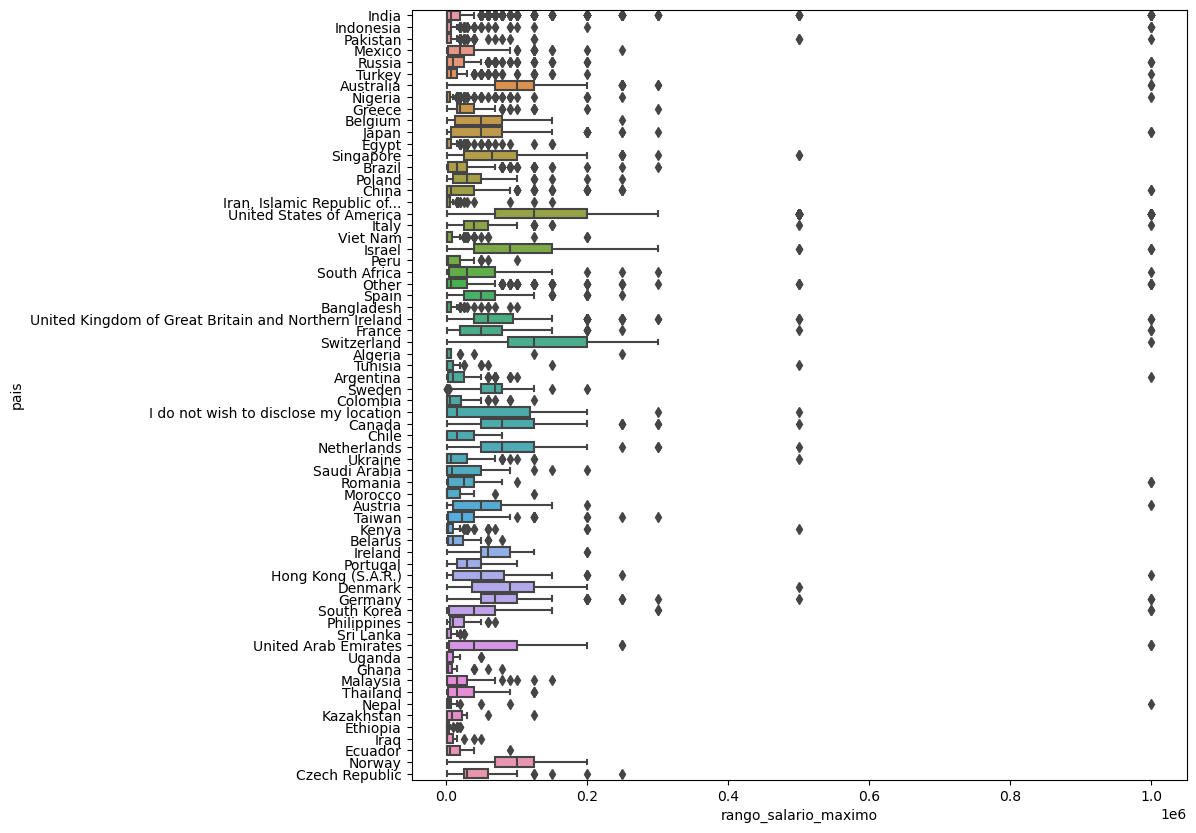

In [38]:
sns.boxplot(x= "rango_salario_maximo", y="pais", data = df)
#plt.yticks(rotation = 45)
#plt.xlim([0,300000])

<AxesSubplot:xlabel='rango_salario_maximo', ylabel='sector_trabajo_actual'>

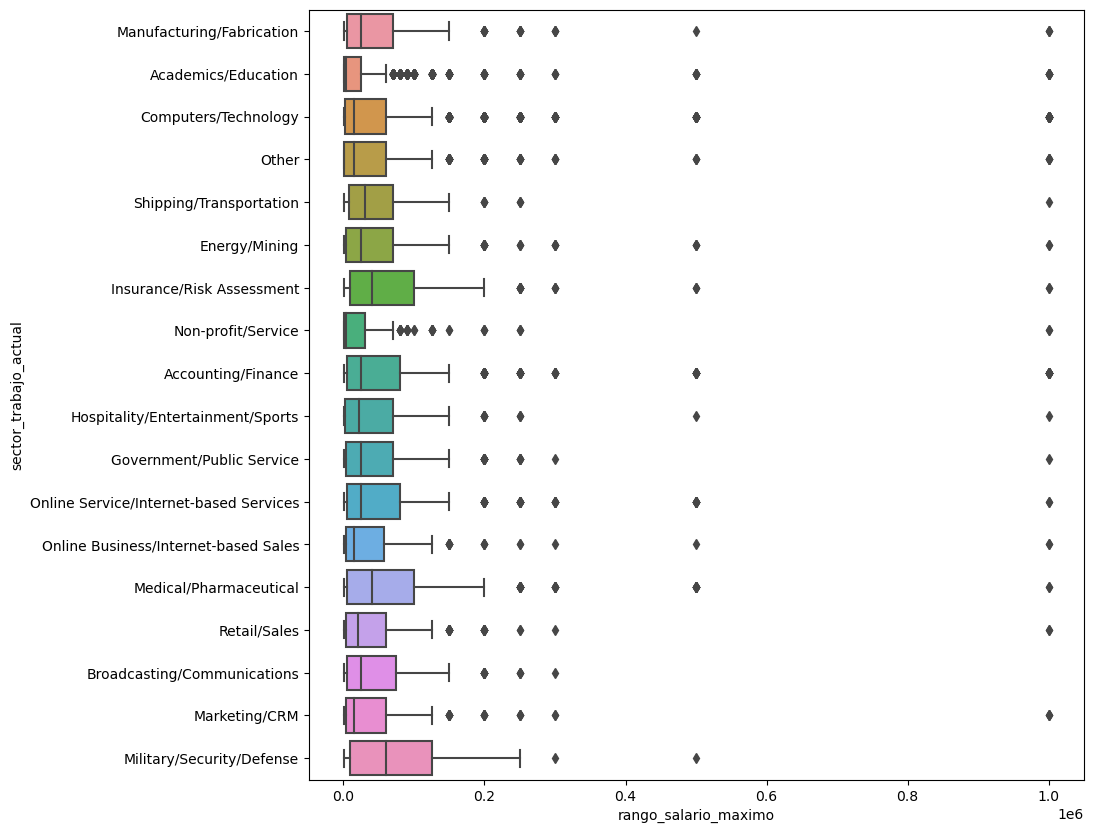

In [39]:
sns.boxplot(x= "rango_salario_maximo", y="sector_trabajo_actual", data = df)
#plt.yticks(rotation = 45)
#plt.xlim([0,300000])

<AxesSubplot:xlabel='rango_salario_maximo', ylabel='puesto_trabajo'>

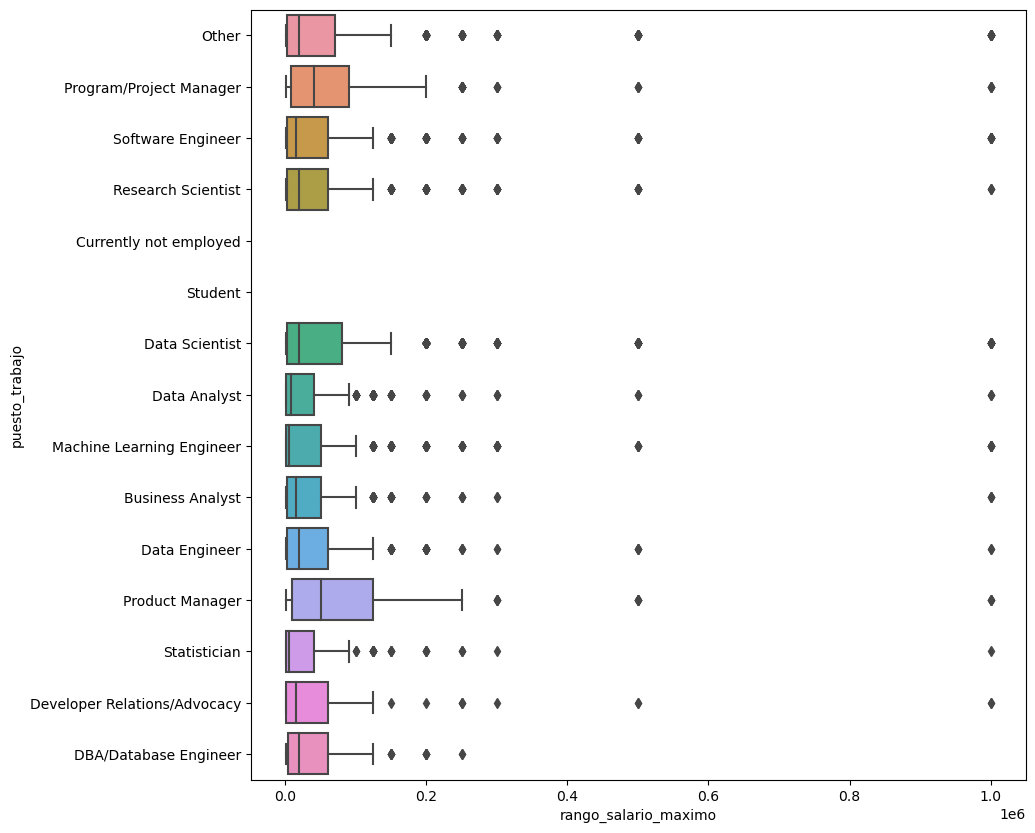

In [44]:
sns.boxplot(x= "rango_salario_maximo", y="puesto_trabajo", data = df)
#plt.yticks(rotation = 45)
#plt.xlim([0,300000])

In [46]:
df[(df["puesto_trabajo"] == "Student")].count()

edad                     6804
genero                   6804
pais                     6804
años_programando         6804
salario_anual               0
sector_trabajo_actual       0
puesto_trabajo           6804
rango_salario_minimo        0
rango_salario_maximo        0
continente               6804
dtype: int64

In [47]:
df[(df["puesto_trabajo"] == "Currently not employed")].count()

edad                     1986
genero                   1986
pais                     1986
años_programando         1986
salario_anual               0
sector_trabajo_actual       0
puesto_trabajo           1986
rango_salario_minimo        0
rango_salario_maximo        0
continente               1986
dtype: int64

<AxesSubplot:xlabel='rango_salario_maximo', ylabel='puesto_trabajo'>

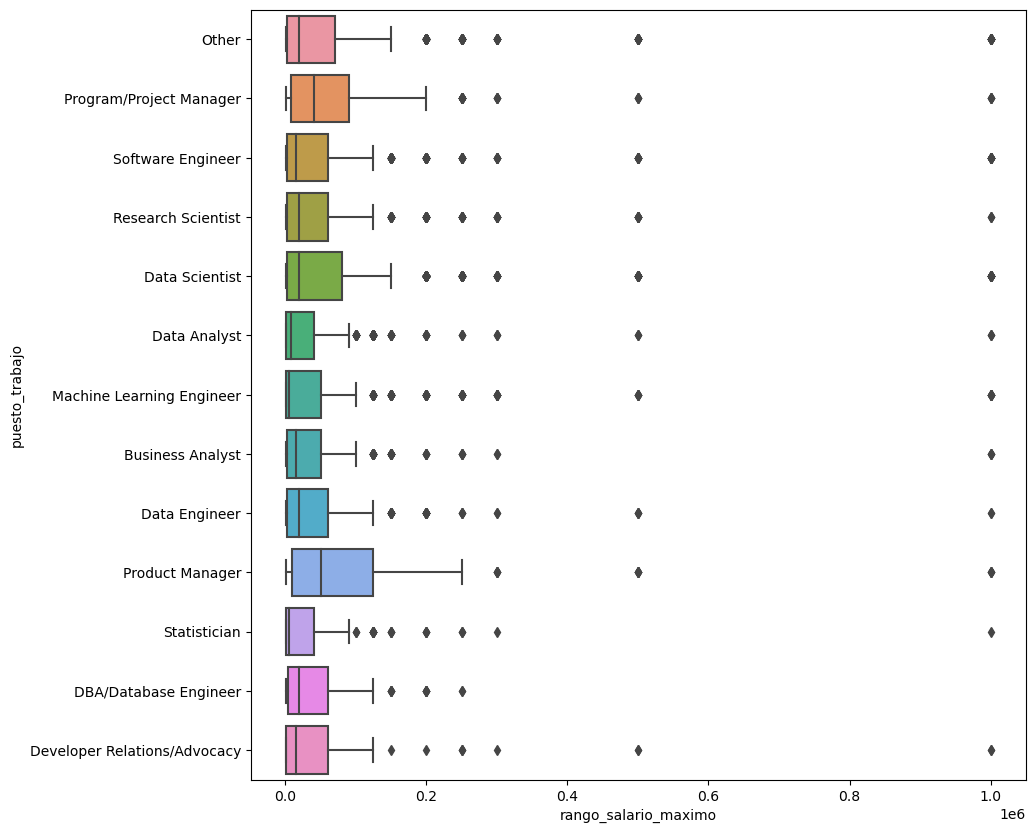

In [48]:
sns.boxplot(x= "rango_salario_maximo", y="puesto_trabajo", data = df_sin_nulos)

In [ ]:
# Función para detectar outliers
def detectar_outliers(lista_columnas, dataframe):
    # Diccionario donde almacenar los índices de los outliers
    dicc_indices = {}
    # Iterar por la lista de las columnas numéricas del dataframe
    for col in lista_columnas:
        # Calcular los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        # Calcular el rango intercuartilico
        IQR = Q3 - Q1
        # Para calcular el limite
        outlier_step = 1.5 * IQR
        # Filtrar el dataframe para identificar los outliers
        df_outliers = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        # Si el DataFrame de outliers tiene algún registro
        if df_outliers.shape[0] > 0:
            #insertamos en el diccionario la columna y los índices outliers
            dicc_indices[col] = list(df_outliers.index)
    return df_outliers

In [53]:
Q1 = np.nanpercentile(df["rango_salario_maximo"], 25)
Q3 = np.nanpercentile(df["rango_salario_maximo"], 75)
# Calcular el rango intercuartilico
IQR = Q3 - Q1
# Para calcular el limite
outlier_step = 1.5 * IQR
# Filtrar el dataframe para identificar los outliers
df_outliers = df[(df["rango_salario_maximo"] < Q1 - outlier_step) | (df["rango_salario_maximo"] > Q3 + outlier_step)]
df_outliers.head()

,edad,genero,pais,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_minimo,rango_salario_maximo,continente
76,50-54,Man,United States of America,20+ years,"300,000-499,999",Computers/Technology,Data Engineer,300000.0,499999.0,America
80,35-39,Man,United States of America,10-20 years,"200,000-249,999",Medical/Pharmaceutical,Research Scientist,200000.0,249999.0,America
89,55-59,Man,United States of America,20+ years,"125,000-149,999",Other,Software Engineer,125000.0,149999.0,America
121,70+,Man,United States of America,3-5 years,"250,000-299,999",Energy/Mining,Other,250000.0,299999.0,America
158,30-34,Man,Singapore,5-10 years,"125,000-149,999",Insurance/Risk Assessment,Data Scientist,125000.0,149999.0,Asia


In [54]:
df_outliers.shape

(1204, 10)

In [58]:
df["continente"].value_counts()

Asia       14147
America     4687
Europa      3303
Africa      1951
Otros       1621
Oceania      264
Name: continente, dtype: int64

In [57]:
df_outliers["continente"].value_counts()

America    717
Asia       212
Europa     178
Oceania     45
Otros       36
Africa      16
Name: continente, dtype: int64

In [59]:
(df_outliers["continente"].value_counts()) / (df["continente"].value_counts())

Africa     0.008201
America    0.152976
Asia       0.014986
Europa     0.053890
Oceania    0.170455
Otros      0.022209
Name: continente, dtype: float64

In [66]:
df_outliers.to_csv("data/3_tabla_outliers.csv")

In [67]:
df_outliers.index

Int64Index([   76,    80,    89,   121,   158,   167,   184,   191,   239,
              283,
            ...
            25753, 25758, 25835, 25840, 25846, 25885, 25910, 25911, 25914,
            25963],
           dtype='int64', length=1204)

In [ ]:
dfs_sin_outliers = dfs_sin_outliers.drop(dfs_sin_outliers.index[list(valores_ind_out)])

In [69]:
dfcopia = df_sin_nulos.copy()

In [72]:
dfcopia = dfcopia.drop(list(df_outliers.index), axis = 0)

In [73]:
dfcopia.shape

(14187, 10)

In [75]:
dfcopia.to_csv("data/4_tabla_sin_nulos_sin_outliers.csv")